## Topics :
- Probability
- Permutation and Combination
- Confidence Interval
- p-value
- Hypothesis Testing

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Queen\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### What is probability ? 
- Probability is a measure of the likelihood of an event.

        Eg : Rolling of a dice {1,2,3,4,5,6}
        P(6) = (Number of ways an event can occur) / (Number of possible outcomes)

###### Addition Rule (Probability, "or") : There exist two concepts in this rule.
1. Mutual Exclusive Event : 

       * Two events are mutually exclusive if they cannot occur at the same time.Like, in a rolling of a dice you can get either of these {1,2,3,4,5,6} at a time and not {1,2}.Similarly, in tossing a coin you can get either head or tail and not both at the same time.
       * Add.Rule => P(A or B) = P(A)+P(B)
        
2. Non- Mutual Exclusive Event : 

       * Multiple events can occur at the same time. Like in a deck of cards different cards can come at the same time.
       *  Add.Rule => P(A or B) = P(A)+P(B)-P(A and B)
       
###### Multiplicative Rule : There exist two concepts in this rule.
1. Independent Events : 

        * If the outcome of one event does not affect the outcome of another, then those events are referred to as independent events. The multiplication rule of probability for dependent events can be extended for the independent events. 
        
        * We have, P(A ∩ B) = P(A) P(B | A), so if the events A and B are independent, then, P(B | A) = P(B), and thus, the above theorem reduces to 
        P(A ∩ B) = P(A) P(B). That means that the probability that both of these occur simultaneously is the product of their respective probabilities.
        
2. Dependent Events : 

        * If the outcome of one event affects the outcome of the other, then those events are referred to as dependent events. Sometimes, the occurring of the first event impacts the probability of the second event. 
        
        * We have, P(A ∩ B) = P(A) P(B | A), where A and B are independent events.
        
#### Multiple Independent Observations :
Let's return to coin flipping to illustrate situations where we have an event consisting of multiple independent observations. For example, the probability of throwing two consecutive heads is: $$ P(\text{HH}) = \frac{1}{4} = 0.25 $$ ...because there is one HH event in the sample set of four possible events ($\Omega$ = {HH, HT, TH, TT}).

Likewise, the probability of throwing *three* consecutive heads is: $$ P(\text{HHH}) = \frac{1}{8} = 0.125 $$ ...because there is one HHH event in the sample set of eight possible events ($\Omega$ = {HHH, HHT, HTH, THH, HTT, THT, TTH, TTT}).

As final examples, the probability of throwing exactly two heads in three tosses is $ P = \frac{3}{8} = 0.375 $ while the probability of throwing at least two heads in three tosses is $ P = \frac{4}{8} = 0.5 $.

**Exercises**:

1. What is the probability of drawing the ace of spades twice in a row? (Assume that any card drawn on the first draw will be put back in the deck before the second draw.)
2. You draw a card from a deck of cards. After replacing the drawn card back in the deck and shuffling thoroughly, what is the probability of drawing the same card again?
3. Use $n \choose k$ to calculate the probability of throwing three heads in five coin tosses.
4. Create a Python method that solves exercise 3 and incorporates the $n \choose k$ formula $\frac{n!}{k!(n - k)!}$. With the method in hand, calculate the probability of -- in five tosses -- throwing each of zero, one, two, three, four, and five heads.

1. $$ P(\text{ace of spades}) \times P(\text{ace of spades}) = \left(\frac{1}{52}\right)^2 = \frac{1}{2704} = 0.00037 = 0.037\% $$

2. $$ P(\text{any card}) = \frac{52}{52} = 1 $$
$$ P(\text{same card as first draw}) = \frac{1}{52} \approx 0.019 $$
$$ P(\text{any card})P(\text{same card as first draw}) = (1)(\frac{1}{52}) = \frac{1}{52} \approx 0.019$$

3. $$ {n \choose k} = {5 \choose 3} = \frac{5!}{3!(5 - 3)!} = \frac{5!}{(3!)(2!)} = \frac{5 \times 4 \times 3 \times 2 \times 1}{(3 \times 2 \times 1)(2 \times 1)} = \frac{120}{(6)(2)} = \frac{120}{12} = 10 $$

$$P = \frac{10}{2^n} = \frac{10}{2^5} = \frac{10}{32} = 0.3125 $$

In [2]:
from math import factorial
def conflip_prob(n,k):
    n_choose_k = factorial(n) / (factorial(k) * factorial(n-k))
    return (n_choose_k) / 2**n

In [3]:
conflip_prob(5,3)

0.3125

In [4]:
[conflip_prob(5,h) for h in range(6)]

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

#### The Law of Large Numbers
The **law of large numbers** states that the more experiments we run, the closer we will tend to get to the expected probability.

Let's run some code to examine this in practice. To start, we'll create a vector of exponentially increasing $n$umbers of coin tosses per experiment:

In [5]:
ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])

In [6]:
np.random.seed(2) # for reproduction

We will discuss the `binomial()` method in more details later. For now it suffices to think of its two arguments as *number of coin flips in experiment* and *probability of heads*, while it returns the number of flips that are heads in the experiment.

In [7]:
np.random.binomial(1,0.5)

0

In [8]:
heads_count = [np.random.binomial(n, 0.5) for n in ns]
heads_count

[0, 2, 4, 8, 15, 31, 68, 124, 245, 521, 1028, 2090]

In [9]:
proportion_heads = heads_count/ns
proportion_heads

array([0.        , 0.5       , 0.5       , 0.5       , 0.46875   ,
       0.484375  , 0.53125   , 0.484375  , 0.47851562, 0.50878906,
       0.50195312, 0.51025391])

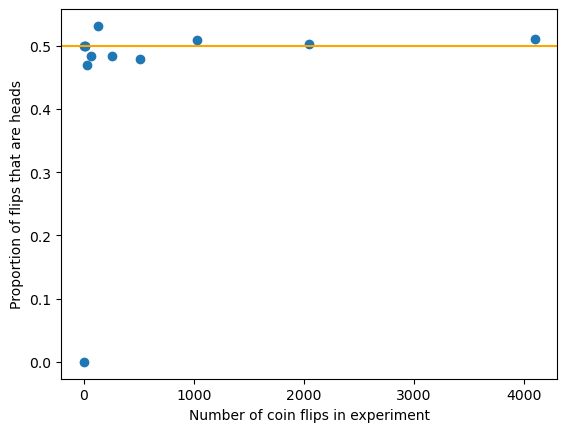

In [10]:
fig, ax = plt.subplots()
plt.xlabel('Number of coin flips in experiment')
plt.ylabel('Proportion of flips that are heads')
plt.axhline(0.5, color='orange')
_ = ax.scatter(ns, proportion_heads)

### Understanding Permutations and Combinations :
Before diving into code, let's clarify these terms:

**Permutation:** An arrangement of objects in a specific order. For example, the permutations of the digits 1, 2, and 3 are: 123, 132, 213, 231, 312, and 321.

**Combination:** A selection of objects where order doesn't matter. For example, the combinations of two digits from 1, 2, and 3 are: (1, 2), (1, 3), and (2, 3).

###### Python Implementation using itertools :
Python's itertools module provides efficient functions for generating permutations and combinations.

In [11]:
import itertools

def generate_permutations(elements):
  return list(itertools.permutations(elements))

# Example usage:
elements = [1, 2, 3]
permutations = generate_permutations(elements)
print(permutations)
# formula used : nPr = n! / (n-r)!

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]


In [12]:
import itertools

def generate_combinations(elements, r):
  return list(itertools.combinations(elements, r))

# Example usage:
elements = [1, 2, 3, 4]
r = 2
combinations = generate_combinations(elements, r)
print(combinations)
# formula used : nCr = n! / (r! * (n-r)!)

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


### Applications in Machine Learning
While these functions might seem purely mathematical, they have significant applications in machine learning:

**Feature Engineering:**

- Creating new features by combining existing ones.
- Generating polynomial features for regression models.

**Hyperparameter Tuning:**

- Exploring different combinations of hyperparameters for model optimization.

**Model Selection:**

- Comparing different model architectures or algorithms.

**Sampling:**

- Creating subsets of data for training or validation.

**Beyond itertools:**
For larger datasets or more complex scenarios, you might need custom implementations or libraries like numpy or scipy. These libraries often provide optimized functions for numerical computations.

In [13]:
# Generating polynomial features up to the given degree.
'''      X: A numpy array of features.
        degree: The maximum degree of polynomial features.
and Returns:A numpy array of polynomial features.
import numpy as np
'''
import numpy as np
def generate_polynomial_features(X, degree):
    n_samples, n_features = X.shape
    X_new = np.ones((n_samples, 1))
    for i in range(1, degree + 1):
        for j in range(n_features):
            X_new = np.hstack((X_new, X[:, j:j+1] ** i))
    return X_new

def main():
    # Sample data
    X = np.array([[1, 2], [3, 4], [5, 6]])
    degree = 2

    # Generate polynomial features
    X_poly = generate_polynomial_features(X, degree)

    print(X_poly)

if __name__ == "__main__":
    main()


[[ 1.  1.  2.  1.  4.]
 [ 1.  3.  4.  9. 16.]
 [ 1.  5.  6. 25. 36.]]


### Confidence Intervals
The confidence interval is the range of values that you expect your estimate to fall between a certain percentage of the time if you run your experiment again or re-sample the population in the same way. It is used to estimate the precision of a sample statistic. 

The confidence level is the percentage of times you expect to reproduce an estimate between the upper and lower bounds of the confidence interval, and is set by the alpha value.

**For a normal distribution:
Confidence Interval = sample statistic ± (critical value) * (standard error)**

Where:
- Sample statistic: The mean, proportion, or other statistic calculated from the sample.
- Critical value: The z-score or t-score corresponding to the desired confidence level.
- Standard error: The standard deviation of the sampling distribution.

In [14]:
import numpy as np
import scipy.stats as stats   # scipy.stats for statistics 

# Sample data
data = np.random.normal(loc=10, scale=2, size=100)

# Calculate confidence interval
confidence_level = 0.95
n = len(data)
mean = np.mean(data)
std_err = np.std(data) / np.sqrt(n)
z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)
margin_of_error = z_critical * std_err
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print(confidence_interval)


(9.472910575888685, 10.294790425486672)


### P-value
The p-value is the probability of obtaining results as extreme as the observed results, assuming the null hypothesis is true. It is used in hypothesis testing to determine the significance of the results.   

**The p-value is calculated using the appropriate test statistic (z-score, t-score, chi-square, etc.) and the distribution of the test statistic under the null hypothesis.**

In [15]:
import scipy.stats as stats

# Sample data
data1 = np.random.normal(loc=10, scale=2, size=50)
data2 = np.random.normal(loc=12, scale=2, size=50)

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(data1, data2)

print(p_value)


0.0001747550666923958


### Hypothesis Testing
Hypothesis testing is a statistical method used to determine whether there is enough evidence to reject a null hypothesis in favor of an alternative hypothesis.

**Steps :**

1. Formulate the null and alternative hypotheses:
- Null hypothesis (H0): There is no difference between the groups or populations.
- Alternative hypothesis (H1): There is a difference between the groups or populations.
2. Choose a significance level (alpha): This is the probability of rejecting the null hypothesis when it is true.
3. Calculate the test statistic: This is a measure of how far the sample data deviate from what is expected under the null hypothesis.
4. Determine the p-value: This is the probability of obtaining results as extreme as the observed results, assuming the null hypothesis is true.
5. Make a decision: If the p-value is less than the significance level, reject the null hypothesis. Otherwise, fail to reject the null hypothesis.   


In [16]:
import scipy.stats as stats

# Sample data
data1 = np.random.normal(loc=10, scale=2, size=50)
data2 = np.random.normal(loc=12, scale=2, size=50)

# Hypothesis test
alpha = 0.05
t_statistic, p_value = stats.ttest_ind(data1, data2)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Reject the null hypothesis
